In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost
from lightgbm import LGBMClassifier
import lightgbm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score,recall_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# utility: to ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

import pickle

# Functions

In [190]:
def count_values(df):
    '''
    Counts size, non-NaN values, 
    number of unique values and 
    NaN values percentage per column of data set
    '''
    
    return df.agg(['size', 'count', 'nunique',  lambda x: x.isnull().sum()/len(x)*100]).rename(index={'<lambda_0>': 'NaN percentage'})


def plot_target_variable(df):
    '''
    Plots target variable and prints distribution
    '''
    
    (df['LoanApproved'].value_counts(normalize=True)*100).plot.bar(title='Loan Approved', ylabel='Percents')
    plt.show()

    print (df['LoanApproved'].value_counts(normalize=True))


def plot_applicants_general_info(df):
    '''
    Plots applicants' general information based on columns:
    ApplicantGender, ApplicantMarried, ApplicantEducation,
    ApplicantDependents, ApplicantCreditHistory, ApplicantHomeOwn
    '''

    fig, axs = plt.subplots(3, 2, figsize=(16, 10))
    axs[0, 0].bar(df['ApplicantGender'].value_counts(normalize=True).index, df['ApplicantGender'].value_counts(normalize=True)*100)
    axs[0, 0].set_title('Applicant Gender')
    axs[0, 0].set_ylabel('Percents')
    axs[0, 1].bar(df['ApplicantMarried'].value_counts(normalize=True).index, df['ApplicantMarried'].value_counts(normalize=True)*100)
    axs[0, 1].set_title('Applicant Married')
    axs[0, 1].set_ylabel('Percents')
    axs[1, 0].bar(df['ApplicantEducation'].value_counts(normalize=True).index, df['ApplicantEducation'].value_counts(normalize=True)*100)
    axs[1, 0].set_title('Applicant Education')
    axs[1, 0].set_ylabel('Percents')
    axs[1, 1].bar(df['ApplicantDependents'].value_counts(normalize=True).index, df['ApplicantDependents'].value_counts(normalize=True)*100)
    axs[1, 1].set_title('Applicant Dependents')
    axs[1, 1].set_ylabel('Percents')
    axs[2, 0].bar(df['ApplicantCreditHistory'].value_counts(normalize=True).index, df['ApplicantCreditHistory'].value_counts(normalize=True)*100)
    axs[2, 0].set_title('Applicant Credit History')
    axs[2, 0].set(xticks=([0,1]))
    axs[2, 0].set_ylabel('Percents')
    axs[2, 1].bar(df['ApplicantHomeOwn'].value_counts(normalize=True).index, df['ApplicantHomeOwn'].value_counts(normalize=True)*100)
    axs[2, 1].set_title('Applicant Home Own')
    axs[2, 1].set_ylabel('Percents')
    plt.show()

    
def plot_applicants_employment_info(df):
    '''
    Plots applicants' emplyment information based on columns:
    ApplicantEmplLength, ApplicantSelfEmployed, ApplicantIncome
    
    Also, prints .describe() of ApplicantIncome column
    '''
    
    fig, axs = plt.subplots(1, 2, figsize=(20,5))

    axs[0].bar(df['ApplicantEmplLength'].value_counts(normalize=True).index, df['ApplicantEmplLength'].value_counts(normalize=True)*100)
    axs[0].set_title('Applicant Employment Length', fontsize=20)
    axs[0].set_ylabel('Percents')
    axs[1].bar(df['ApplicantSelfEmployed'].value_counts(normalize=True).index, df['ApplicantSelfEmployed'].value_counts(normalize=True)*100)
    axs[1].set_title('Applicant Self-Employed', fontsize=20)
    axs[1].set_ylabel('Percents')
    plt.show()
    
    fig2, axs2 = plt.subplots(2, 1, figsize=(20,10), sharex=True)
    axs2[0].hist(df['ApplicantIncome'].values, bins=100, density=True)
    axs2[0].set_title('Applicant Income PDF', fontsize=20)
    axs2[1].boxplot(df['ApplicantIncome'].values, vert=False)
    axs2[1].set_title('Applicant Income Boxplot', fontsize=20)
    plt.show()
    
    df_temp = df['ApplicantIncome'].describe()
    print(f'Applicant Income statistics:\n\n{df_temp}')

    
def plot_loan_info(df):
    '''
    Plot loan information based on columns:
    LoanTerm, LoanAmount
    '''

    (df['LoanTerm'].value_counts(normalize=True)*100).plot.bar(ylabel='Percents')
    plt.title('Loan Term', fontsize=20)
    plt.show()

    fig, axs = plt.subplots(2, 1, figsize=(20,10), sharex=True)
    axs[0].hist(df['LoanAmount'].values, bins=100, density=True)
    axs[0].set_title('Loan Amount PDF', fontsize=20)
    axs[1].boxplot(df['LoanAmount'].dropna().values, vert=False)
    axs[1].set_title('Loan Amount Boxplot', fontsize=20)
    plt.show()
    
    df_temp = df['LoanAmount'].describe()
    print(f'Loan Amount statistics:\n\n{df_temp}')

    
def plot_numeric_bivariate(df):
    '''
    Plots numeric variables vs target variable:
    Applicant Income, Loan Amount, Loan Term
    
    NOTE - boxplots are commented in order to reduce clutter
    '''
    
#    # loan amount vs loan approved
#     df.boxplot(column='LoanAmount', by='LoanApproved')
#     plt.title('')
#     plt.show()

    fig10, ax10 = plt.subplots()
    ax10.hist(df[df['LoanApproved']=='Y']['LoanAmount'], label='Approved', color='green', histtype='step', density=True, bins=100)
    ax10.hist(df[df['LoanApproved']=='N']['LoanAmount'], label='Not Approved', color='red', histtype='step', density=True, bins=100)
    ax10.legend(prop={'size': 10})
    ax10.set_title('Loan Amount vs Loan Approved PDF')
    plt.show()
    
#    # applicant income vs loan approved

#     df.boxplot(column='ApplicantIncome', by='LoanApproved')
#     plt.title('')
#     plt.show()

    fig11, ax11 = plt.subplots()
    ax11.hist(df[df['LoanApproved']=='Y']['ApplicantIncome'], label='Approved', color='green', histtype='step', density=True, bins=100)
    ax11.hist(df[df['LoanApproved']=='N']['ApplicantIncome'], label='Not Approved', color='red', histtype='step', density=True, bins=100)
    ax11.legend(prop={'size': 10})
    ax11.set_title('Applicant Income vs Loan Approved PDF')
    plt.show()
    
#    # loan term vs loan approved

#     df.boxplot(column='LoanTerm', by='LoanApproved')
#     plt.title('')
#     plt.show()

    fig12, ax12 = plt.subplots()
    ax12.hist(df[df['LoanApproved']=='Y']['LoanTerm'], label='Approved', color='green', histtype='step', density=True, bins=100)
    ax12.hist(df[df['LoanApproved']=='N']['LoanTerm'], label='Not Approved', color='red', histtype='step', density=True, bins=100)
    ax12.legend(prop={'size': 10}, loc='upper left')
    ax12.set_title('Loan Term vs Loan Approved PDF')
    plt.show()    
    

def plot_categorical_bivariate(df):
    '''
    Plots categorical variables vs target variable:
    ApplicantGender, ApplicantMarried, ApplicantDependents,
    ApplicantCreditHistory, LoanIntRate
    
    Due to the nature of data set, rest of the categorical variables 
    are commented out to reduce the clutter
    '''    
    
    # applicant gender vs loan approved

    gender = pd.crosstab(df['ApplicantGender'], df['LoanApproved'])
    gender.div(gender.sum(1), axis=0).plot.bar(stacked=True)
    plt.title('Applicant Gender vs Loan Approved')
    plt.show()
    
    # applicant married vs loan approved

    married = pd.crosstab(df['ApplicantMarried'], df['LoanApproved'])
    married.div(married.sum(1), axis=0).plot.bar(stacked=True)
    plt.title('Applicant Married vs Loan Approved')
    plt.show()
    
    # applicant dependents vs loan approved

    dependents = pd.crosstab(df['ApplicantDependents'], df['LoanApproved'])
    dependents.div(dependents.sum(1), axis=0).plot.bar(stacked=True)
    plt.title('Applicant Dependents vs Loan Approved')
    plt.show()

#     # applicant education vs loan approved

#     education = pd.crosstab(df['ApplicantEducation'], df['LoanApproved'])
#     education.div(education.sum(1), axis=0).plot.bar(stacked=True)
#     plt.title('Loan Approved vs Applicant Education ')
#     plt.show()

#     # applicant self employed vs loan approved

#     self_employed = pd.crosstab(df['ApplicantSelfEmployed'], df['LoanApproved'])
#     self_employed.div(self_employed.sum(1), axis=0).plot.bar(stacked=True)
#     plt.title('Loan Approved vs Applicant Self Employed ')
#     plt.show()

#     # applicant ZIP vs loan approved

#     app_zip = pd.crosstab(df['ApplicantZIP'], df['LoanApproved'])
#     app_zip.div(app_zip.sum(1), axis=0).plot.bar(stacked=True)
#     plt.title('Loan Approved vs Applicant ZIP ')
#     plt.show()

#     # applicant employment length vs loan approved

#     employment = pd.crosstab(df['ApplicantEmplLength'], df['LoanApproved'])
#     employment.div(employment.sum(1), axis=0).plot.bar(stacked=True)
#     plt.title('Loan Approved vs Applicant Employment Length ')
#     plt.show()

#     # applicant home own vs loan approved

#     home_own = pd.crosstab(df['ApplicantHomeOwn'], df['LoanApproved'])
#     home_own.div(home_own.sum(1), axis=0).plot.bar(stacked=True)
#     plt.title('Loan Approved vs Applicant Home Own ')
#     plt.show()
    
    # applicant credit history vs loan approved

    credit_hist = pd.crosstab(df['ApplicantCreditHistory'], df['LoanApproved'])
    credit_hist.div(credit_hist.sum(1), axis=0).plot.bar(stacked=True)
    plt.title('Applicant Credit History vs Loan Approved')
    plt.show()

    # applicant loan interest rate vs loan approved

    loan_int = pd.crosstab(df['LoanIntRate'], df['LoanApproved'])
    loan_int.div(loan_int.sum(1), axis=0).plot.bar(stacked=True)
    plt.title('Loan Interest Rate vs Loan Approved', fontsize=20)
    plt.show()

    top10loan_na = loan_int.loc[loan_int.divide(loan_int.sum(1), axis='rows')['N'].nlargest(10).index]
    print(f'Top 10 most frequently not approved loan interest rates :\n\n{top10loan_na}')


def check_nan_percentage_per_column(df, disp=1):
    '''
    Displays NaN percentage per column
    '''
    
    nan_percentage = df.isna().sum()/len(df)*100
    if disp==1:
        print(f'Missing data percentage per column:\n\n{nan_percentage}')
        return
    
    return nan_percentage


def remove_high_nan_columns(df, perc=50):
    '''
    Removes columns with >perc percent of NaN values
    '''
    
    nan_percentage = check_nan_percentage_per_column(df, 0)
    for index in nan_percentage.index:
        if nan_percentage[index] > 50:
            df.drop(index, axis=1, inplace=True)
    
    
def fill_nan_values(df):
    
    ''' 
    fill NaN values for ApplicantGender, ApplicantMarried, 
    ApplicantDependents, ApplicantSelfEmployed, LoanTerm using mode
    LoanAmount using median
    ApplicantEmplLength using ffill
    '''

    df['ApplicantGender'].fillna(df['ApplicantGender'].mode()[0], inplace=True)
    df['ApplicantMarried'].fillna(df['ApplicantMarried'].mode()[0], inplace=True)
    df['ApplicantDependents'].fillna(df['ApplicantDependents'].mode()[0], inplace=True)
    df['ApplicantSelfEmployed'].fillna(df['ApplicantSelfEmployed'].mode()[0], inplace=True)
    df['LoanTerm'].fillna(df['LoanTerm'].mode()[0], inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)

    # fill NaN values for ApplicantEmplLength using forward fill method
    df['ApplicantEmplLength'].fillna(method='ffill', inplace=True)

    
def plot_corr_heatmap(df):
    '''
    Plot correlation heatmap
    '''

    corr = df_mod.corr()

    fig, ax = plt.subplots(figsize=(16,10))
    sns.heatmap(corr, annot=True)
    plt.title('df_mod correlation heatmap', fontsize=20)
    plt.show()

    
def fill_nan_credithistory(df_temp, save_model=0):
    '''
    Fills NaN values of ApplicantCreditHistory column using logistic regression
    Not the eye-candy of codes, but it works...
    
    Polish it if there is time...
    '''
    
    Xnan_cred, Xnan, ynan = create_dataset_for_nan_model(df_temp)   
    Xnan_cred, Xnan = scale_xnans(Xnan_cred, Xnan)   
    x_train, x_test, y_train, y_test = train_test_split(Xnan, ynan, test_size=0.3)    
    C = run_gridsearchcv(Xnan, ynan)
    
    # running logistic regression model
    
    lr = LogisticRegression(C=C)
    lr.fit(x_train,y_train)
    score = f1_score(y_test,lr.predict(x_test))
    print('Logistic Regression F1 score:',score)   
    pred_cred = lr.predict(Xnan_cred)
    
    # save the model to disk
    if save_model == 1:
        save_model(lr, 'lr_credithistory.sav')
    
    
    ind_nan_values = df_temp[df_mod['ApplicantCreditHistory'].isna()]['ApplicantCreditHistory'].index.values
    df_pred_cred = pd.DataFrame(pred_cred, index=ind_nan_values)
    
    # fill cred history NaN values with df_pred_cred

    for i in df_temp[df_mod['ApplicantCreditHistory'].isna()]['ApplicantCreditHistory'].index.values:
        if np.isnan(df_mod['ApplicantCreditHistory'].loc[i]):
            df_temp['ApplicantCreditHistory'].loc[i] = df_pred_cred.loc[i][0]
        else:
            print(f'Error! at {i}')
        
    return df_temp

def create_dataset_for_nan_model(df_temp):
    '''
    Create data sets for logistic regression
    '''
    
    Xnan_cred = df_mod[df_mod['ApplicantCreditHistory'].isna()].drop('ApplicantCreditHistory', axis=1)
    Xnan = df_mod[df_mod['ApplicantCreditHistory'].notna()].drop('ApplicantCreditHistory', axis=1)
    ynan = df_mod[df_mod['ApplicantCreditHistory'].notna()]['ApplicantCreditHistory']   

    return Xnan_cred, Xnan, ynan  
    
def scale_xnans(Xnan_cred, Xnan):
    '''
    scaling column values
    '''
    
    rob_scaler = RobustScaler()
    columns_to_fit = ['ApplicantDependents', 'ApplicantIncome', 'ApplicantZIP', 'ApplicantEmplLength',\
                 'ApplicantHomeOwn', 'LoanAmount', 'LoanTerm', 'LoanIntRate']                 
    rob_scaler.fit(Xnan[columns_to_fit])
    Xnan[columns_to_fit] = rob_scaler.fit_transform(Xnan[columns_to_fit])
    Xnan_cred[columns_to_fit] = rob_scaler.fit_transform(Xnan_cred[columns_to_fit])   
    
    return Xnan_cred, Xnan
    
    
def run_gridsearchcv(Xnan, ynan):
    '''
    logistic regression hyperparameter tuning
    '''
    
    logreg = LogisticRegression()
    param = {'C': [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5]}
    clf = GridSearchCV(logreg, param, scoring='f1', cv=10)
    clf.fit(Xnan, ynan)

    return clf.best_params_['C']

    
def fit_evaluate_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Fits the given model and predicts labels based on validation set
    Inputs: model, X_train, y_train, X_valid, y_valid
    Outputs: 
    [0] - model: fitted model
    [1] - y_predicted - predicted values
    [2] - confusion matrix of predictions
    [3] - classification report of predictions
    '''
    
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    
    return model, y_predicted, confusion_matrix(y_valid, y_predicted), classification_report(y_valid, y_predicted)


def plot_feature_importances(model, X_train):
    '''
    Plots feature importances attribute of the tree model
    '''
    
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns.values
    plt.title('Feature Importances after hyperparameter tuning')
    j = X_train.shape[1]

    plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
    plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
    plt.xlabel('Relative Importance')
    plt.show()
    
    
def plot_confusion_matrix(y, y_predicted):
    '''
    Plots confusion matrix from predictions
    '''
    
    ConfusionMatrixDisplay.from_predictions(
        y,
        y_predicted,
    )
    plt.show()

def plot_f1_score(y_val, dt_pred, rf_pred, xgb_pred):
    # create dataframe of f1 score and model and sort values
    performance_comparison = pd.DataFrame({'Model':[ 'Decision Tree', 'Random Forests','XGBoost'],\
                                           'F1': [f1_score(y_val, dt_pred), f1_score(y_val, rf_pred), f1_score(y_val, xgb_pred)]})

    performance_comparison = performance_comparison.sort_values(by='F1', ascending='True')

    #set the plot
    plt.figure(figsize=(10,10))
    ax = sns.barplot(x='F1', y='Model', data=performance_comparison, palette='Greens_d')

    #set the title arrange labels
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.title("F1 Score of Different Models", size=20)
    plt.show()
    

def plot_recall_score(y_val, dt_pred, rf_pred, xgb_pred):
    # create dataframe of f1 score and model and sort values
    performance_comparison = pd.DataFrame({'Model':[ 'Decision Tree', 'Random Forests','XGBoost'],\
                                           'Recall': [recall_score(y_val, dt_pred), recall_score(y_val, rf_pred), recall_score(y_val, xgb_pred)]})

    performance_comparison = performance_comparison.sort_values(by='Recall', ascending='True')

    #set the plot
    plt.figure(figsize=(10,10))
    ax = sns.barplot(x='Recall', y='Model', data=performance_comparison, palette='Greens_d')

    #set the title arrange labels
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.title("Recall Score of Different Models", size=20)
    plt.show()
    

def save_model(model, filename):
    # save the model to disk
    pickle.dump(model, open(filename, 'wb'))

def load_model(filename):
    # load the model from disk
    model = pickle.load(open(filename, 'rb'))
    return model


# Read data

In [3]:
df = pd.read_csv('task_two.csv')

# EDA

### - Overview of the data set

In [4]:
df.head()

,Unnamed: 0,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
0,0,56026,19874,Moški,NE,0 oseb,Diplomiral,NE,1949.666667,1.0,33xx,Slovenija,5 let,STANOVANJSKI KREDIT,NaN,90.0,1.42%,NaN,prenova,Y
1,1,53884,34258,Moški,DA,1 oseba,Diplomiral,NE,1527.666667,1.0,64xx,Slovenija,10+ let,NAJEM,44800.0,90.0,3.9%,NaN,drugo,N
2,2,28446,65530,Moški,DA,0 oseb,Diplomiral,DA,1000.000000,1.0,14xx,SI,2 leti,STANOVANJSKI KREDIT,23100.0,90.0,3.26%,NaN,NaN,Y
3,3,48350,66552,Moški,DA,0 oseb,Brez diplome,NE,861.000000,1.0,30xx,si,3 leta,NAJEM,42000.0,90.0,2.8%,NaN,NaN,Y
4,4,7213,4270,Moški,NE,0 oseb,Diplomiral,NE,2000.000000,1.0,21xx,SI,< 1 leto,STANOVANJSKI KREDIT,49350.0,90.0,2.9%,NaN,NaN,Y


In [5]:
df.info()
print(f'\nDataframe shape:\n{df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55382 entries, 0 to 55381
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              55382 non-null  int64  
 1   LoanID                  55382 non-null  int64  
 2   ApplicantID             55382 non-null  int64  
 3   ApplicantGender         54169 non-null  object 
 4   ApplicantMarried        55102 non-null  object 
 5   ApplicantDependents     53994 non-null  object 
 6   ApplicantEducation      55382 non-null  object 
 7   ApplicantSelfEmployed   52486 non-null  object 
 8   ApplicantIncome         55382 non-null  float64
 9   ApplicantCreditHistory  50900 non-null  float64
 10  ApplicantZIP            55382 non-null  object 
 11  ApplicantState          55382 non-null  object 
 12  ApplicantEmplLength     52729 non-null  object 
 13  ApplicantHomeOwn        55382 non-null  object 
 14  LoanAmount              53391 non-null

In [6]:
# count of non-NaN values, size, number of unique values and NaN percentage per column
count_values(df)

,Unnamed: 0,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
size,55382.0,55382.0,55382.0,55382.000000,55382.000000,55382.000000,55382.0,55382.000000,55382.0,55382.000000,55382.0,55382.0,55382.000000,55382.0,55382.000000,55382.000000,55382.0,55382.000000,55382.000000,55382.0
count,55382.0,55382.0,55382.0,54169.000000,55102.000000,53994.000000,55382.0,52486.000000,55382.0,50900.000000,55382.0,55382.0,52729.000000,55382.0,53391.000000,54069.000000,55382.0,2180.000000,21317.000000,55382.0
nunique,55382.0,55382.0,55382.0,2.000000,2.000000,4.000000,2.0,2.000000,505.0,2.000000,44.0,5.0,11.000000,3.0,203.000000,10.000000,65.0,1552.000000,9.000000,2.0
NaN percentage,0.0,0.0,0.0,2.190242,0.505579,2.506229,0.0,5.229136,0.0,8.092882,0.0,0.0,4.790365,0.0,3.595031,2.370806,0.0,96.063703,61.509155,0.0


### - Visualization (univariate)

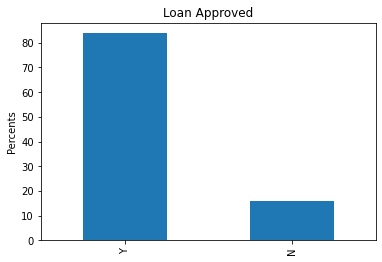

Y    0.838792
N    0.161208
Name: LoanApproved, dtype: float64


In [7]:
# plot target class distribution

plot_target_variable(df)

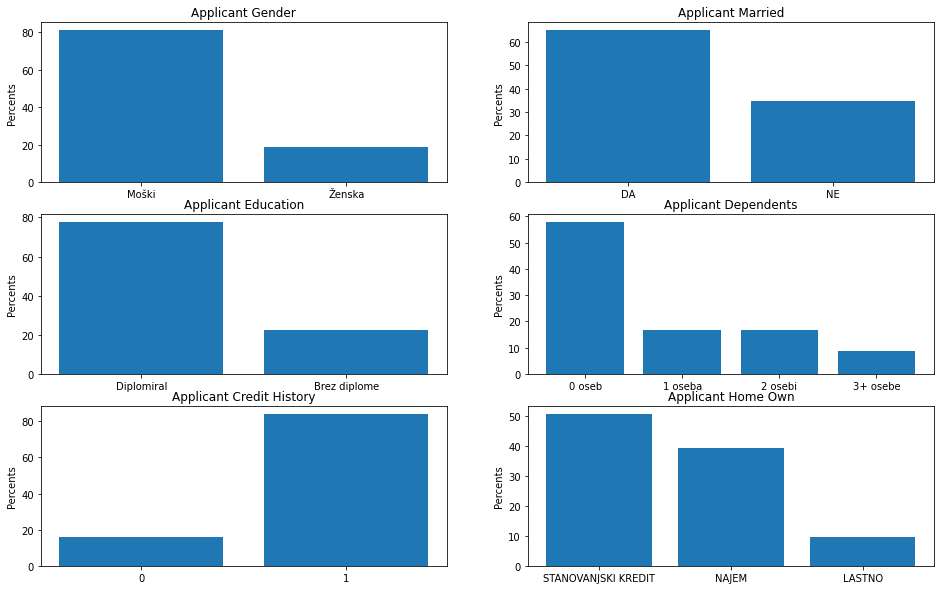

In [8]:
# plot applicants' general info

plot_applicants_general_info(df)

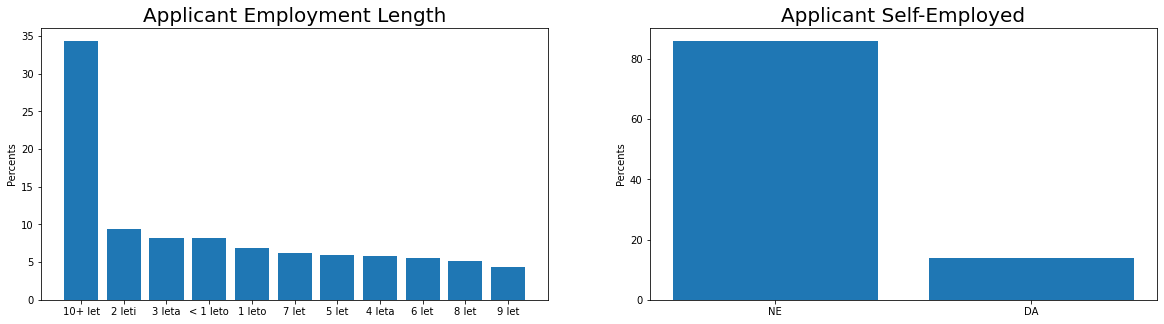

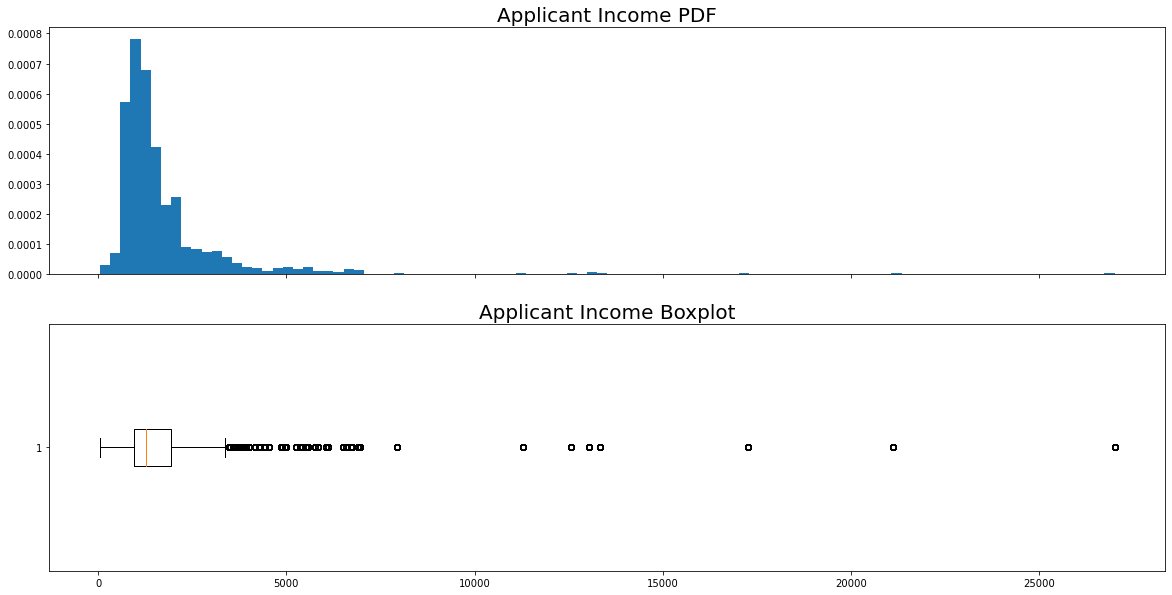

Applicant Income statistics:

count    55382.000000
mean      1797.359196
std       2006.631015
min         50.000000
25%        958.666667
50%       1270.666667
75%       1933.333333
max      27000.000000
Name: ApplicantIncome, dtype: float64


In [9]:
# plot applicants' employment info

plot_applicants_employment_info(df)

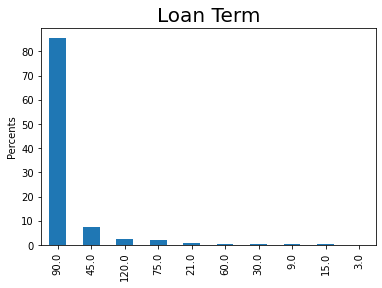

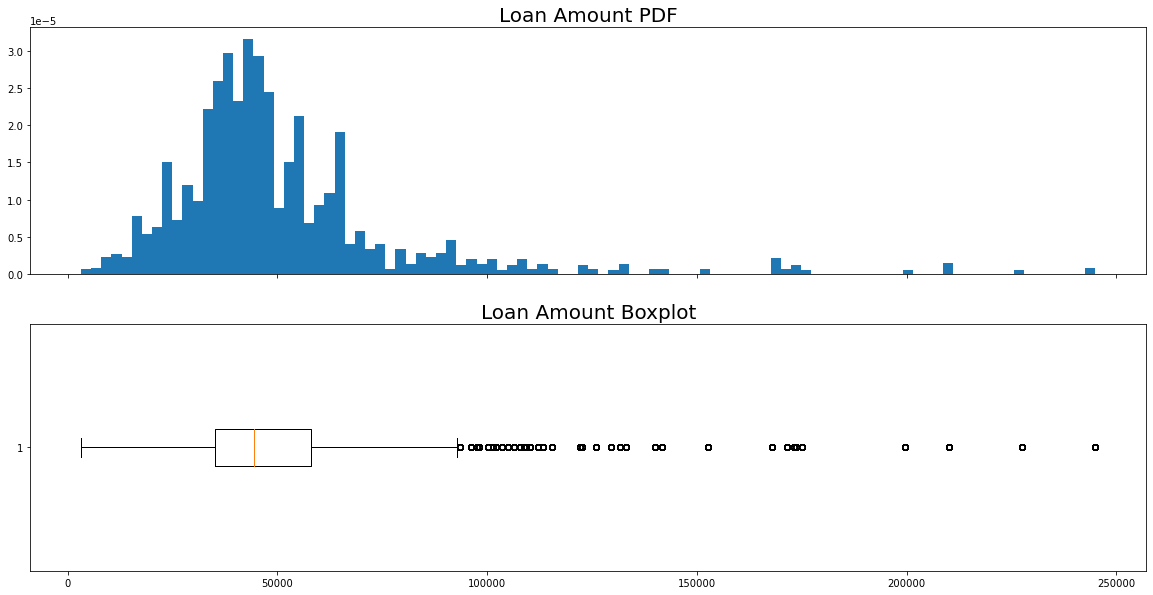

Loan Amount statistics:

count     53391.000000
mean      51076.787286
std       29981.641674
min        3150.000000
25%       35000.000000
50%       44450.000000
75%       58100.000000
max      245000.000000
Name: LoanAmount, dtype: float64


In [10]:
# plot loan information

plot_loan_info(df)

### - Visualization (bivariate)

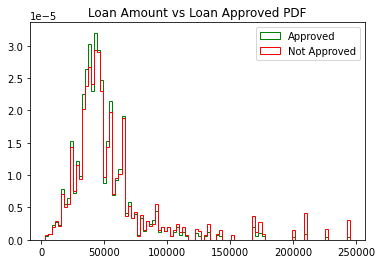

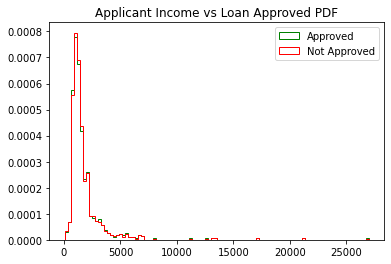

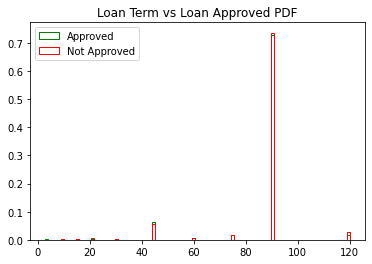

In [11]:
# plot loan amount, applicant income, loan term vs loan approved

plot_numeric_bivariate(df)

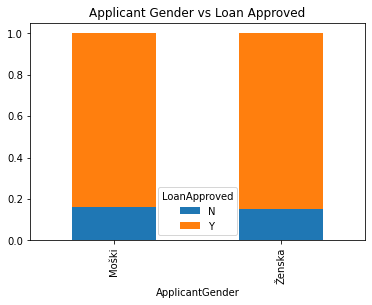

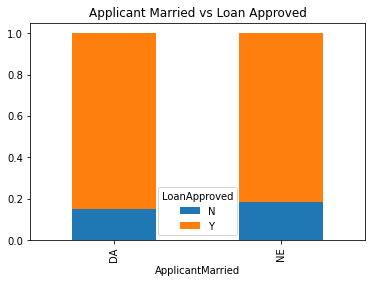

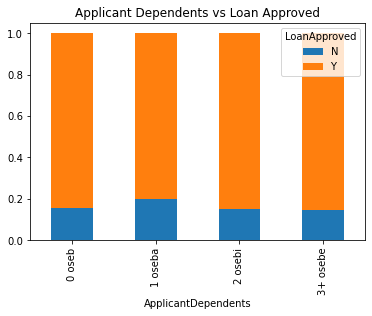

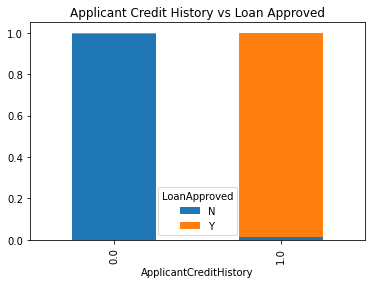

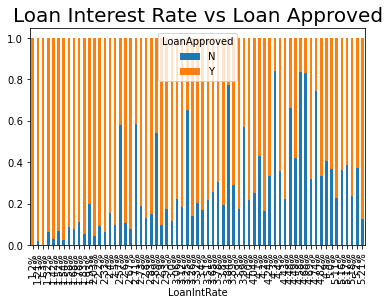

Top 10 most frequently not approved loan interest rates :

LoanApproved    N   Y
LoanIntRate          
4.3%           57  11
4.58%          51  10
4.68%          64  13
3.84%          91  27
4.74%          35  12
4.48%          33  17
3.25%         104  55
2.71%          88  63
2.57%          62  45
3.99%          37  28


In [12]:
# plot categorical variables vs loan approved

plot_categorical_bivariate(df)

### - Handling missing data part 1

In [13]:
# checking NaN percentage

check_nan_percentage_per_column(df)

Missing data percentage per column:

Unnamed: 0                 0.000000
LoanID                     0.000000
ApplicantID                0.000000
ApplicantGender            2.190242
ApplicantMarried           0.505579
ApplicantDependents        2.506229
ApplicantEducation         0.000000
ApplicantSelfEmployed      5.229136
ApplicantIncome            0.000000
ApplicantCreditHistory     8.092882
ApplicantZIP               0.000000
ApplicantState             0.000000
ApplicantEmplLength        4.790365
ApplicantHomeOwn           0.000000
LoanAmount                 3.595031
LoanTerm                   2.370806
LoanIntRate                0.000000
LoanDesc                  96.063703
LoanPurpose               61.509155
LoanApproved               0.000000
dtype: float64


In [16]:
# remove columns with high NaN percentage (>50%)

remove_high_nan_columns(df)

In [21]:
# fill NaN values

fill_nan_values(df)

# will fill ApplicantCreditHistory after 
# converting object columns to numerical ordian values

In [23]:
# re-checking NaN percentage

check_nan_percentage_per_column(df)

Missing data percentage per column:

Unnamed: 0                0.000000
LoanID                    0.000000
ApplicantID               0.000000
ApplicantGender           0.000000
ApplicantMarried          0.000000
ApplicantDependents       0.000000
ApplicantEducation        0.000000
ApplicantSelfEmployed     0.000000
ApplicantIncome           0.000000
ApplicantCreditHistory    8.092882
ApplicantZIP              0.000000
ApplicantState            0.000000
ApplicantEmplLength       0.000000
ApplicantHomeOwn          0.000000
LoanAmount                0.000000
LoanTerm                  0.000000
LoanIntRate               0.000000
LoanApproved              0.000000
dtype: float64


# Creating dataset for model training (df_mod)

In [29]:
# mapping categorical with numeric values

replacements = { 'ApplicantGender': {'Ženska': 0, 'Moški': 1}, \
                'ApplicantMarried': {'NE': 0, 'DA': 1}, \
                'ApplicantDependents': {'0 oseb': 0, '1 oseba': 1, '2 osebi': 2, '3+ osebe': 3}, \
                'ApplicantEducation': {'Brez diplome': 0, 'Diplomiral': 1}, \
                'ApplicantSelfEmployed': {'NE': 0, 'DA': 1}, \
               'ApplicantEmplLength': {'< 1 leto': 0, '1 leto': 1, '2 leti': 2, '3 leta': 3, '4 leta': 4, \
                                      '5 let': 5, '6 let': 6, '7 let': 7, '8 let': 8, '9 let': 9, '10+ let': 10}, \
               'ApplicantHomeOwn': {'STANOVANJSKI KREDIT': 0, 'NAJEM': 1, 'LASTNO': 2}, \
               'LoanApproved': {'N': 0, 'Y': 1}}


# create df_mod as a dataframe with replacement values 
# and removing first 3 columns: <Unnamed: 0>, LoanID and ApplicantID (non-informative)
df_mod = df.replace(replacements).iloc[:, 3:]

# removing column ApplicantState (non-informative)
df_mod.drop('ApplicantState', axis=1, inplace=True)

# removing % from 'LoanIntRate' column and converting it to numerical value
df_mod['LoanIntRate'] = df_mod['LoanIntRate'].str.replace('%', '').astype('float64')

# converting 'ApplicantZIP' column from categorical to enumerated type:
'''
categorical data is sorted before enumeration (sort=True)
mapping_index contains category to enumeration mapping
mapping can be retrieved using mapping_index.get_loc('00xx')
'''
df_mod['ApplicantZIP'], mapping_index = pd.factorize(df_mod['ApplicantZIP'], sort=True)

print(df_mod.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55382 entries, 0 to 55381
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ApplicantGender         55382 non-null  int64  
 1   ApplicantMarried        55382 non-null  int64  
 2   ApplicantDependents     55382 non-null  int64  
 3   ApplicantEducation      55382 non-null  int64  
 4   ApplicantSelfEmployed   55382 non-null  int64  
 5   ApplicantIncome         55382 non-null  float64
 6   ApplicantCreditHistory  50900 non-null  float64
 7   ApplicantZIP            55382 non-null  int64  
 8   ApplicantEmplLength     55382 non-null  int64  
 9   ApplicantHomeOwn        55382 non-null  int64  
 10  LoanAmount              55382 non-null  float64
 11  LoanTerm                55382 non-null  float64
 12  LoanIntRate             55382 non-null  float64
 13  LoanApproved            55382 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 

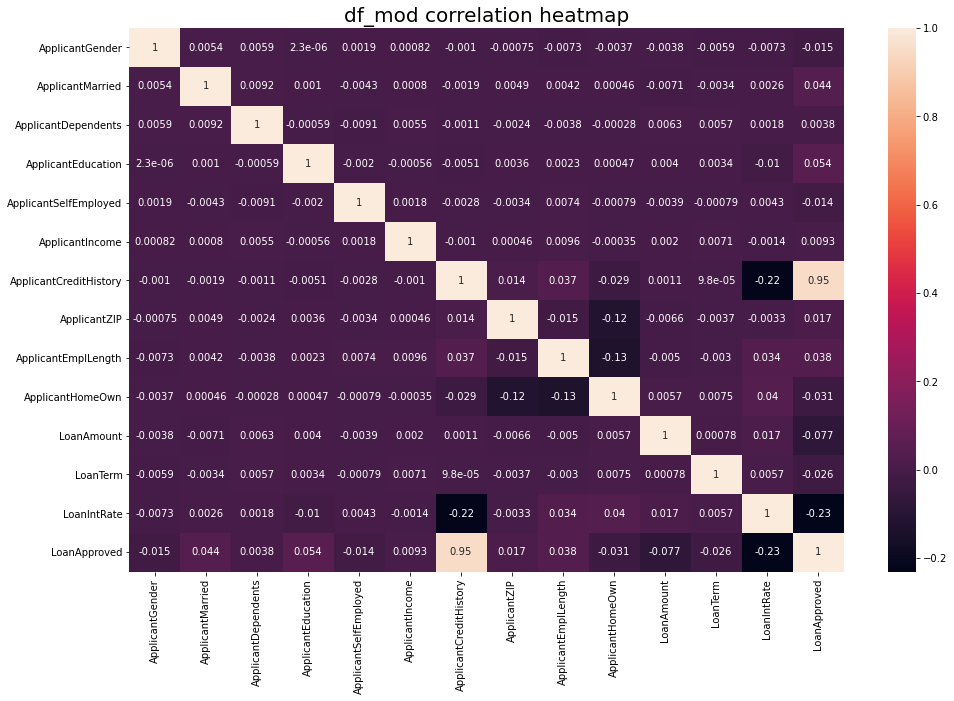

In [32]:
# plot correlation heatmap

plot_corr_heatmap(df)

### - Handling missing data part 2

In [39]:
# fill NaN values in ApplicantCreditHistory column

df_mod = fill_nan_credithistory(df_mod)

Logistic Regression F1 score: 0.9930717733146505


In [40]:
# verify df_mod data set

df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55382 entries, 0 to 55381
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ApplicantGender         55382 non-null  int64  
 1   ApplicantMarried        55382 non-null  int64  
 2   ApplicantDependents     55382 non-null  int64  
 3   ApplicantEducation      55382 non-null  int64  
 4   ApplicantSelfEmployed   55382 non-null  int64  
 5   ApplicantIncome         55382 non-null  float64
 6   ApplicantCreditHistory  55382 non-null  float64
 7   ApplicantZIP            55382 non-null  int64  
 8   ApplicantEmplLength     55382 non-null  int64  
 9   ApplicantHomeOwn        55382 non-null  int64  
 10  LoanAmount              55382 non-null  float64
 11  LoanTerm                55382 non-null  float64
 12  LoanIntRate             55382 non-null  float64
 13  LoanApproved            55382 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 

# Model Selection

In [146]:
# create feature and target datasets

X = df_mod.drop('LoanApproved', axis=1)
y = df_mod['LoanApproved']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

### - Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1486
           1       0.99      0.99      0.99      7375

    accuracy                           0.98      8861
   macro avg       0.97      0.97      0.97      8861
weighted avg       0.98      0.98      0.98      8861



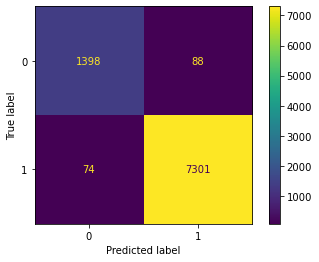

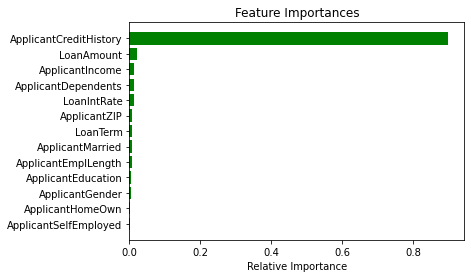

In [147]:
# create model and fit, print score and plot confusion matrix and feature importances

cls_dt = DecisionTreeClassifier()
cls_dt_results = fit_evaluate_model(cls_dt, X_train, y_train, X_val, y_val)

print(cls_dt_results[3])
plot_confusion_matrix(y_val, cls_dt_results[1])

plot_feature_importances(cls_dt_results[0], X_train)

### - Random Forest Classifier

In [ ]:
# create model and fit, print score and plot confusion matrix and feature importances

cls_rf = RandomForestClassifier()
cls_rf_results = fit_evaluate_model(cls_rf, X_train, y_train, X_val, y_val)

print(cls_rf_results[3])
plot_confusion_matrix(y_val, cls_rf_results[1])

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1486
           1       0.99      1.00      0.99      7375

    accuracy                           0.99      8861
   macro avg       0.99      0.96      0.98      8861
weighted avg       0.99      0.99      0.99      8861



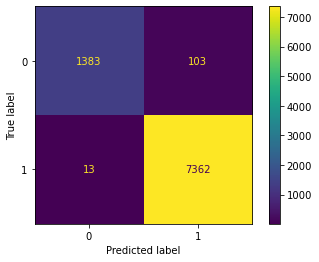

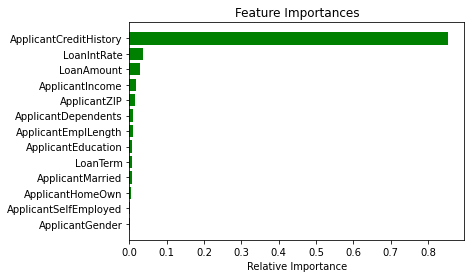

In [148]:
# create model and fit, print score and plot confusion matrix and feature importances

cls_rf = RandomForestClassifier()
cls_rf_results = fit_evaluate_model(cls_rf, X_train, y_train, X_val, y_val)

print(cls_rf_results[3])
plot_confusion_matrix(y_val, cls_rf_results[1])

plot_feature_importances(cls_rf_results[0], X_train)

### - XGBoost Classifier

[00:31:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1486
           1       0.99      1.00      0.99      7375

    accuracy                           0.99      8861
   macro avg       0.99      0.97      0.98      8861
weighted avg       0.99      0.99      0.99      8861



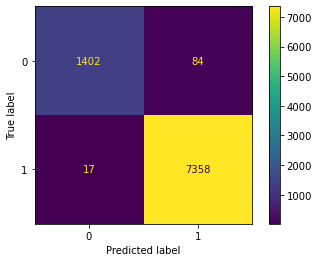

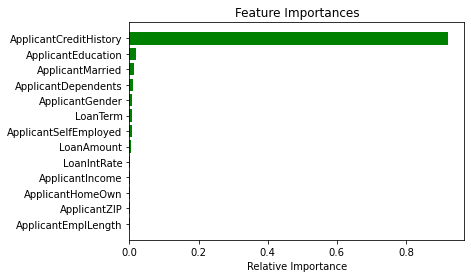

In [150]:
# create model and fit, print score and plot confusion matrix and feature importances

cls_xgb = XGBClassifier()
cls_xgb_results = fit_evaluate_model(cls_xgb, X_train, y_train, X_val, y_val)

print(cls_xgb_results[3])
plot_confusion_matrix(y_val, cls_xgb_results[1])

plot_feature_importances(cls_xgb_results[0], X_train)

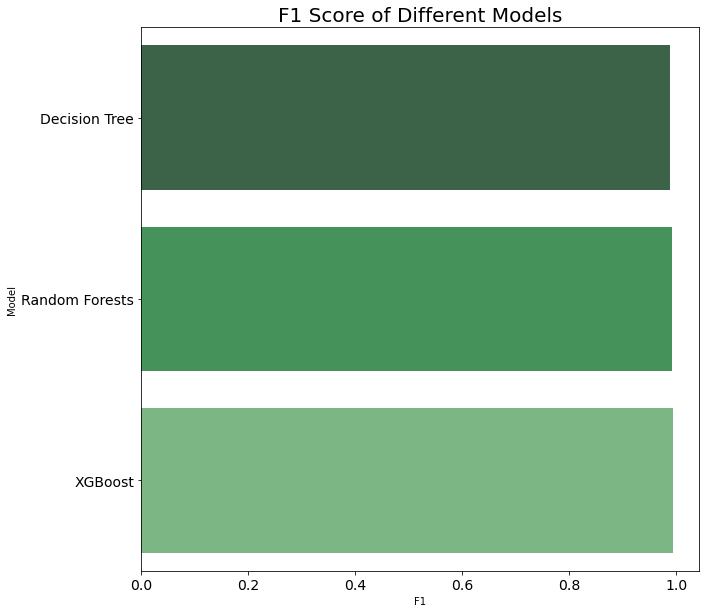

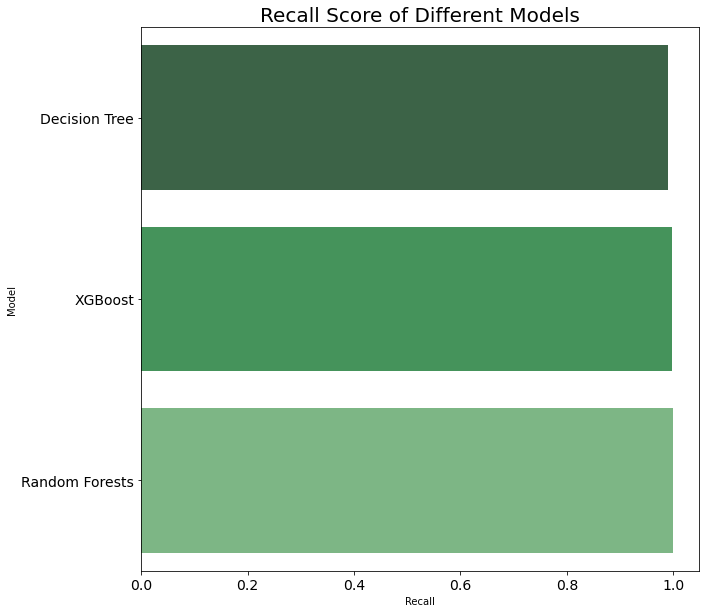

In [151]:
#  plot f1 and recall scores for all 3 classifiers

plot_f1_score(y_val, cls_dt_results[1], cls_rf_results[1], cls_xgb_results[1])
plot_recall_score(y_val, cls_dt_results[1], cls_rf_results[1], cls_xgb_results[1])

### - Hyperparameter tuning for Random Forest classifier

In [157]:
parameters = {'bootstrap': [True, False],\
              'class_weight': ['balanced', 'subsample_balance', None],\
             'max_depth': [2, 4, 6, 8, None],\
             'max_features': ['log2', 'sqrt', None],\
             'min_samples_leaf': [2, 4, 8, 10, 16],\
             'min_samples_split': [2, 5, 8, 10, 15, 20],\
             'n_estimators': [100, 200, 400, 600, 800, 1000]}

best_model=RandomForestClassifier()
cls_rf_cv = RandomizedSearchCV(estimator=best_model, param_distributions=parameters, cv=5, n_jobs=-1, return_train_score=True)

cls_rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'subsample_balance',
                                                         None],
                                        'max_depth': [2, 4, 6, 8, None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [2, 4, 8, 10, 16],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800, 1000]},
                   return_train_score=True)

In [158]:
print(f'Best hyperparameters:\n{cls_rf_cv.best_estimator_}')

Best hyperparameters:
RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1000)


In [165]:
cls_rf_final = RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10, max_features='log2', min_samples_leaf=4, min_samples_split=10, n_estimators=600)
cls_rf_final_results = fit_evaluate_model(cls_rf_final, X_train, y_train, X_val, y_val)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1486
           1       0.99      1.00      0.99      7375

    accuracy                           0.99      8861
   macro avg       0.98      0.98      0.98      8861
weighted avg       0.99      0.99      0.99      8861



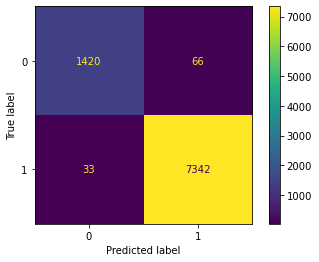

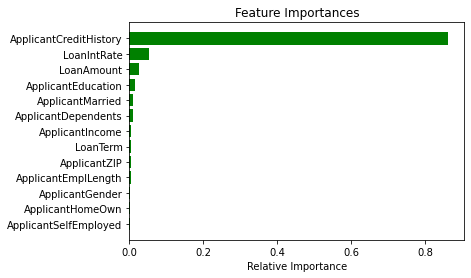

In [166]:
print(cls_rf_final_results[3])
plot_confusion_matrix(y_val, cls_rf_final_results[1])
plot_feature_importances(cls_rf_final_results[0], X_train)

### - Test set classification:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1854
           1       0.99      1.00      0.99      9223

    accuracy                           0.99     11077
   macro avg       0.99      0.98      0.98     11077
weighted avg       0.99      0.99      0.99     11077



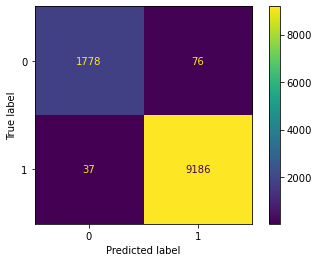

In [167]:
y_predict = cls_rf_final.predict(X_test)
print((classification_report(y_test, y_predict)))
plot_confusion_matrix(y_test, y_predict)

# Explainability

In [ ]:
# create explainability model and fit it to X_test and y_predict

dt_rf = DecisionTreeClassifier()
dt_rf.fit(X_test, y_predict)

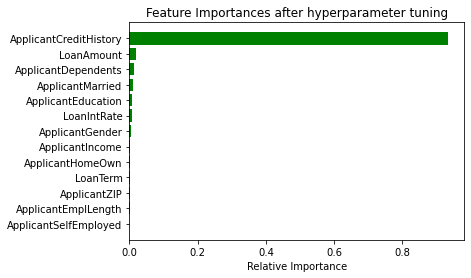

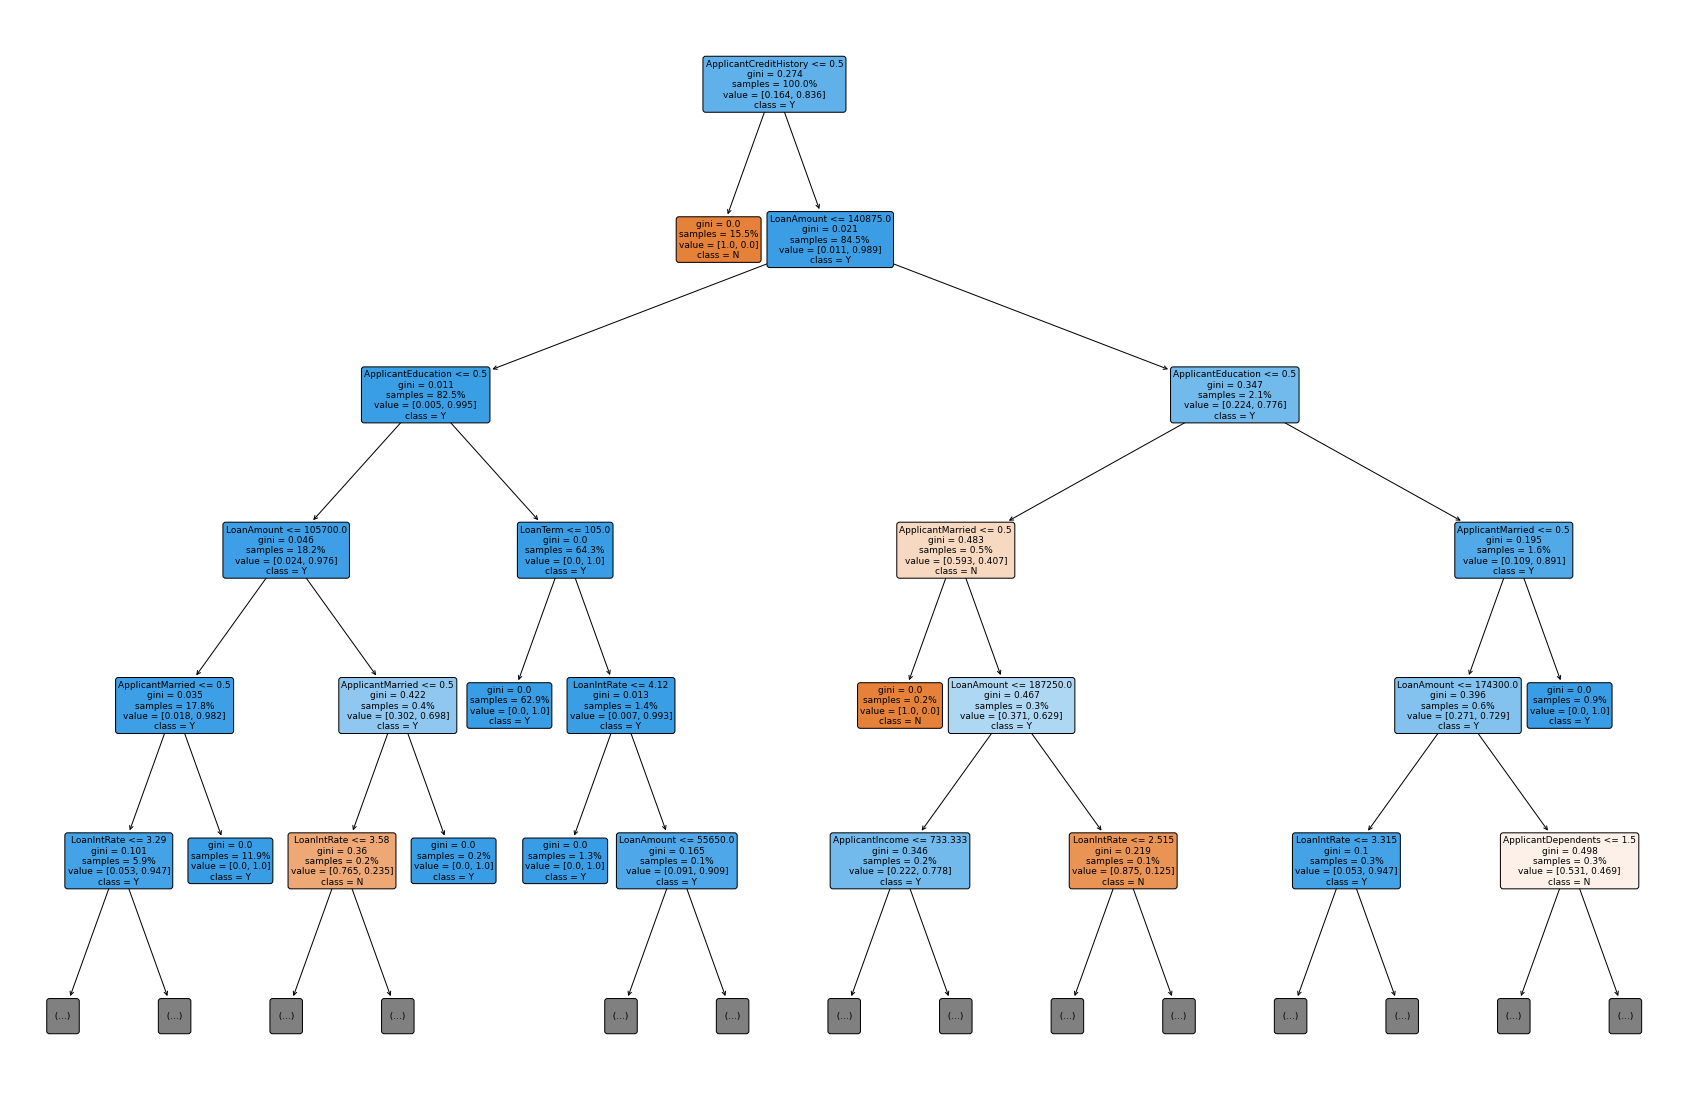

In [185]:
# plot feature importances and explainability model

plot_feature_importances(dt_rf, X_test)


# visualization

fig = plt.figure(figsize=(30, 20))
vis = tree.plot_tree(dt_rf, feature_names=X_test.columns, class_names=['N', 'Y'], max_depth=5, fontsize=9, proportion=True, filled=True, rounded=True)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1486
           1       0.99      0.99      0.99      7375

    accuracy                           0.99      8861
   macro avg       0.98      0.97      0.97      8861
weighted avg       0.99      0.99      0.99      8861



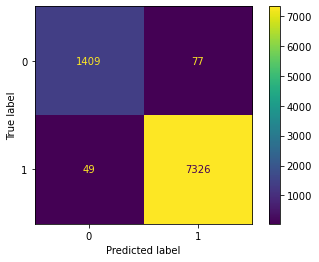

In [186]:
# explainability model prediction on validation data set

y_val_predict = dt_rf.predict(X_val)
print(classification_report(y_val, y_val_predict))
plot_confusion_matrix(y_val, y_val_predict)